##**AMAAN JAVED SYED**
** ** ** **
##**TREUE TECHNOLOGIES INTERNSHIP TASK 2**

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
df=pd.read_excel("/content/drive/MyDrive/Datasets/Online Retail.xlsx")

##**Data Preprocessing**

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
#checking for null values in dataset
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#handling the missing values in dataset
df.dropna(inplace=True)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
#Checking and handling duplicate values

print("Count before handling duplicates :",df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Count before handling duplicates :",df.duplicated().sum())

Count before handling duplicates : 5225
Count before handling duplicates : 0


In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
print("Total Number of Countries Present in dataset :",df.Country.nunique())
print("\n\nCountries present are:\n\n",df.Country.unique())

Total Number of Countries Present in dataset : 37


Countries present are:

 ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


In [10]:
#Calculating total unit price with respect to different countries
units_per_country= df.groupby('Country')['UnitPrice'].sum()

In [11]:
units_per_country

Country
Australia                  4048.000
Austria                    1701.520
Bahrain                      78.950
Belgium                    7540.130
Brazil                      142.600
Canada                      910.580
Channel Islands            3736.900
Cyprus                     3880.040
Czech Republic               88.150
Denmark                    1266.950
EIRE                      38209.260
European Community          294.050
Finland                    3786.850
France                    42825.230
Germany                   37633.440
Greece                      713.290
Iceland                     481.210
Israel                      906.650
Italy                      3879.390
Japan                       814.860
Lebanon                     242.440
Lithuania                    99.440
Malta                       666.010
Netherlands                6492.550
Norway                     6529.060
Poland                     1422.270
Portugal                  12903.250
RSA                 

In [12]:
#calculating the mean unit price
unit_price_mean_country=units_per_country.mean()
unit_price_mean_country

37708.05010810811

In [13]:
print("countries with higher customer unit price")
countries_with_higher_unit_price= units_per_country[units_per_country > unit_price_mean_country]
countries_with_higher_unit_price

countries with higher customer unit price


Country
EIRE                38209.260
France              42825.230
United Kingdom    1165878.034
Name: UnitPrice, dtype: float64

In [14]:
print("countries with low customer unit price")
countries_with_lower_unit_price= units_per_country[units_per_country < unit_price_mean_country]
countries_with_lower_unit_price

countries with low customer unit price


Country
Australia                4048.00
Austria                  1701.52
Bahrain                    78.95
Belgium                  7540.13
Brazil                    142.60
Canada                    910.58
Channel Islands          3736.90
Cyprus                   3880.04
Czech Republic             88.15
Denmark                  1266.95
European Community        294.05
Finland                  3786.85
Germany                 37633.44
Greece                    713.29
Iceland                   481.21
Israel                    906.65
Italy                    3879.39
Japan                     814.86
Lebanon                   242.44
Lithuania                  99.44
Malta                     666.01
Netherlands              6492.55
Norway                   6529.06
Poland                   1422.27
Portugal                12903.25
RSA                       248.10
Saudi Arabia               24.11
Singapore               25108.89
Spain                   12621.50
Sweden                   1804.73
Sw

In [15]:
#Calculating the Quantity according to country
country_quantity=df.groupby('Country')['Quantity'].sum()

In [16]:
country_quantity

Country
Australia                 83643
Austria                    4827
Bahrain                     260
Belgium                   23152
Brazil                      356
Canada                     2763
Channel Islands            9473
Cyprus                     6296
Czech Republic              592
Denmark                    8188
EIRE                     136187
European Community          497
Finland                   10666
France                   109806
Germany                  117341
Greece                     1556
Iceland                    2458
Israel                     3987
Italy                      7999
Japan                     25218
Lebanon                     386
Lithuania                   652
Malta                       944
Netherlands              200128
Norway                    19247
Poland                     3653
Portugal                  16017
RSA                         352
Saudi Arabia                 75
Singapore                  5234
Spain                     26817


In [17]:
sorted_countries=country_quantity.sort_values(ascending=False)
top_10_countries=sorted_countries.head(10)
top_10_countries

Country
United Kingdom    3994870
Netherlands        200128
EIRE               136187
Germany            117341
France             109806
Australia           83643
Sweden              35632
Switzerland         29778
Spain               26817
Japan               25218
Name: Quantity, dtype: int64

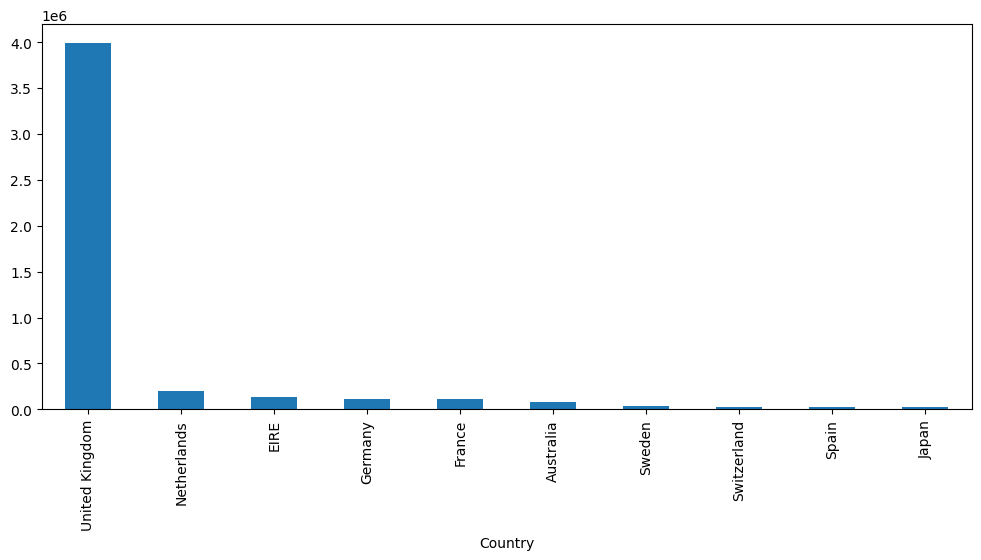

In [18]:
plt.figure(figsize=(12,5))
top_10_countries.plot(kind='bar')
plt.show()

In [19]:
customer_quantity=df.groupby('CustomerID')['Quantity'].sum()
customer_quantity

CustomerID
12346.0       0
12347.0    2458
12348.0    2341
12349.0     631
12350.0     197
           ... 
18280.0      45
18281.0      54
18282.0      98
18283.0    1357
18287.0    1586
Name: Quantity, Length: 4372, dtype: int64

In [20]:
customer_quantity=customer_quantity.sort_values(ascending=False)
customer_quantity

CustomerID
14646.0    196719
12415.0     77242
14911.0     77155
17450.0     69009
18102.0     64122
            ...  
16252.0      -158
16742.0      -189
14213.0      -244
15823.0      -283
16546.0      -303
Name: Quantity, Length: 4372, dtype: int64

In [21]:
top_10_customers=customer_quantity.head(10)
top_10_customers

CustomerID
14646.0    196719
12415.0     77242
14911.0     77155
17450.0     69009
18102.0     64122
17511.0     63012
13694.0     61899
14298.0     58021
14156.0     56908
16684.0     49390
Name: Quantity, dtype: int64

<Axes: xlabel='CustomerID'>

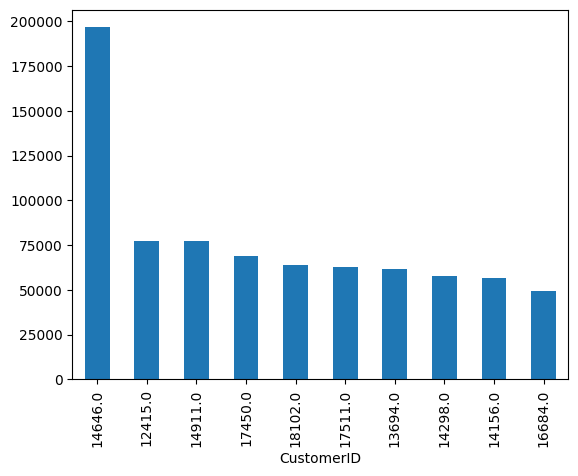

In [22]:
top_10_customers.plot(kind='bar')

In [23]:
df["TotalPrice"]=df["UnitPrice"]*df["Quantity"]
df["TotalPrice"]

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalPrice, Length: 401604, dtype: float64

Text(0.5, 1.0, 'Revenue per Country')

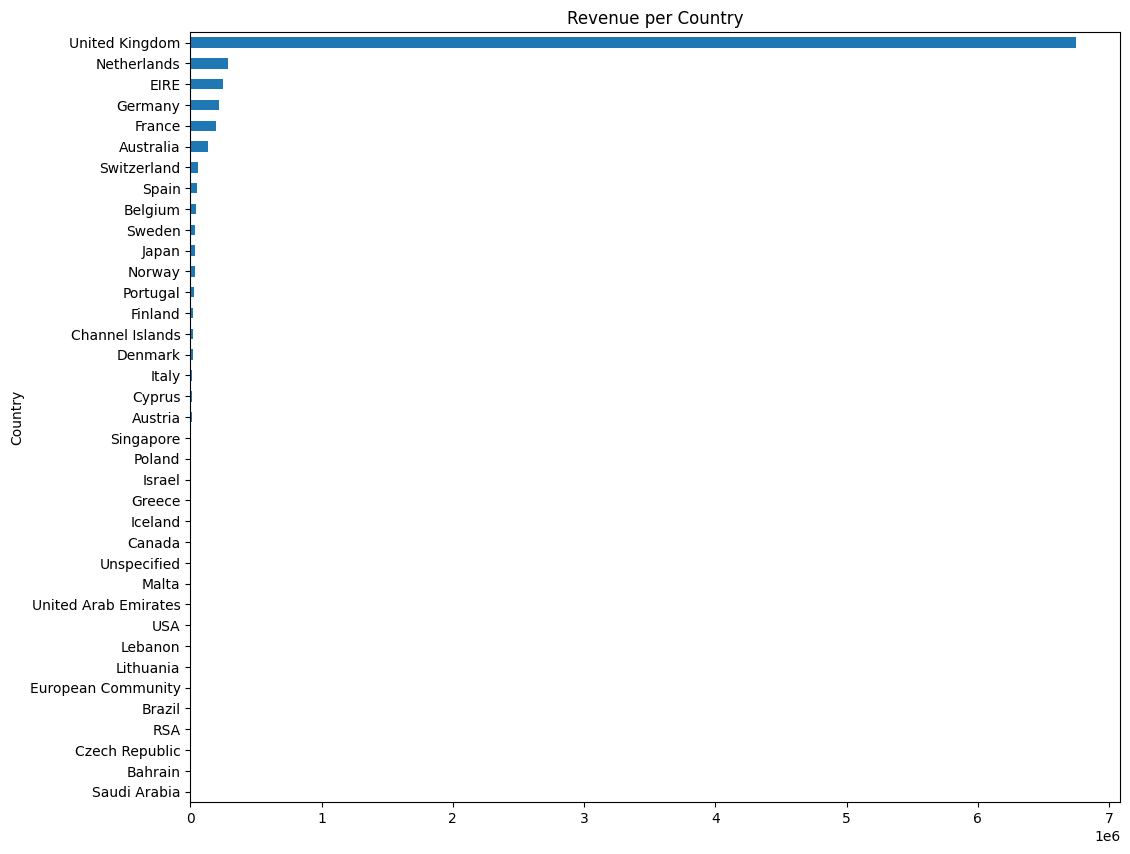

In [24]:
revenue_per_country = df.groupby(["Country"])["TotalPrice"].sum().sort_values()
revenue_per_country.plot(kind='barh', figsize=(12,10))
plt.title("Revenue per Country")

In [25]:
# Monetory Preprocessing

df["CustomerID"]=df["CustomerID"].astype(str)
df_m=df.groupby("CustomerID")["TotalPrice"].sum()
df_m=df_m.reset_index()
df_m.columns=["CustomerID","TotalPrice"]
df_m

,CustomerID,TotalPrice
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2045.53


In [26]:
# Frequency Preprocessing

df_f=df.groupby("CustomerID")["InvoiceNo"].count()
df_f=df_f.reset_index()
df_f.columns=["CustomerID","InvoiceNo"]
df_f

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,721


In [27]:
# Recency Preprocessing

df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"],format="%d-%m-%Y %H:%M")
maximum=max(df['InvoiceDate'])
df["duration"]=maximum-df['InvoiceDate']
df_r=df.groupby("CustomerID")["duration"].min()
df_r=df_r.reset_index()
df_r.columns=["CustomerID","Duration"]
df_r["Duration"]=df_r["Duration"].dt.days
df_r

,CustomerID,Duration
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


In [28]:
# Forming the final dataset

final_dataset=pd.merge(df_r,df_f,on="CustomerID",how="inner")
final_dataset=pd.merge(final_dataset,df_m,on="CustomerID",how="inner")
final_dataset

,CustomerID,Duration,InvoiceNo,TotalPrice
0,12346.0,325,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
...,...,...,...,...
4367,18280.0,277,10,180.60
4368,18281.0,180,7,80.82
4369,18282.0,7,13,176.60
4370,18283.0,3,721,2045.53


In [29]:
# Outlier Removal

Q1 = final_dataset.TotalPrice.quantile(0.05)
Q3 = final_dataset.TotalPrice.quantile(0.95)

IQR = Q3 - Q1
final_dataset= final_dataset[(final_dataset.TotalPrice >=Q1 - 1.5*IQR) & (final_dataset.InvoiceNo <= Q3 + 1.5*IQR)]


Q1 = final_dataset.InvoiceNo.quantile(0.05)
Q3 = final_dataset.InvoiceNo.quantile(0.95)

IQR = Q3 - Q1
final_dataset= final_dataset[(final_dataset.InvoiceNo >=Q1 - 1.5*IQR) & (final_dataset.InvoiceNo <= Q3 + 1.5*IQR)]


Q1 = final_dataset.Duration.quantile(0.05)
Q3 = final_dataset.Duration.quantile(0.95)

IQR = Q3 - Q1
final_dataset= final_dataset[(final_dataset.Duration >=Q1 - 1.5*IQR) & (final_dataset.Duration <= Q3 + 1.5*IQR)]

In [30]:
# Scaling the dataset

scaler=MinMaxScaler()
ScaledData=final_dataset[["Duration","InvoiceNo","TotalPrice"]]
ScaledData=scaler.fit_transform(ScaledData)

ScaledData=pd.DataFrame(ScaledData)
ScaledData.columns=["Duration","InvoiceNo","TotalPrice"]
ScaledData.head()

,Duration,InvoiceNo,TotalPrice
0,0.871314,0.001287,0.016445
1,0.002681,0.232947,0.032976
2,0.198391,0.038610,0.023338
3,0.048257,0.092664,0.023186
4,0.828418,0.020592,0.017728


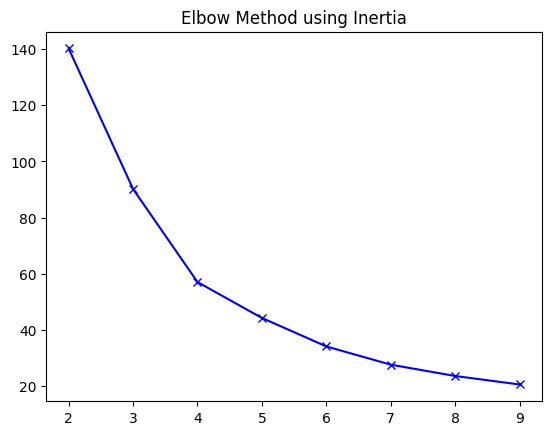

In [31]:
# Finding Clusters using Elbow Method

inertia = []
ranges=range(2,10)

for i in ranges:
  kmean=KMeans(n_clusters=i)
  kmean.fit_predict(ScaledData)
  inertia.append(kmean.inertia_)

plt.plot(ranges,inertia,"bx-")
plt.title("Elbow Method using Inertia")
plt.show()

In [32]:
# Silhouette

ranges=range(2,10)

for i in ranges:
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(ScaledData)
  clustering_labels=kmeans.labels_
  silhouette=silhouette_score(ScaledData,clustering_labels)
  print("Silhouette Score for",i, "clusters is",silhouette)

Silhouette Score for 2 clusters is 0.6303865334813387
Silhouette Score for 3 clusters is 0.5650178750176503
Silhouette Score for 4 clusters is 0.5463673264662462
Silhouette Score for 5 clusters is 0.45015248247643774
Silhouette Score for 6 clusters is 0.45975630083254576
Silhouette Score for 7 clusters is 0.4509247210410078
Silhouette Score for 8 clusters is 0.4393362729513303
Silhouette Score for 9 clusters is 0.4313746077803834


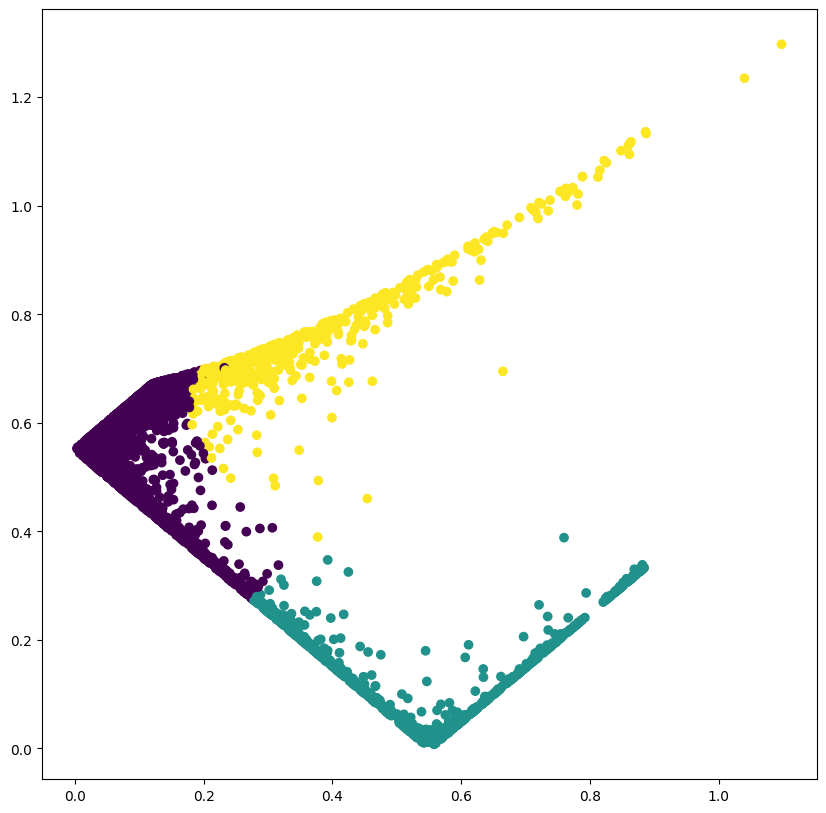

In [33]:
# Modelling

kmeans=KMeans(n_clusters=3)
kmeans.fit(ScaledData)
K_labels=kmeans.labels_
final_dataset["Label"]=K_labels

proj = kmeans.fit_transform(ScaledData)
clusters = kmeans.predict(ScaledData)
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)

<Axes: xlabel='Label', ylabel='TotalPrice'>

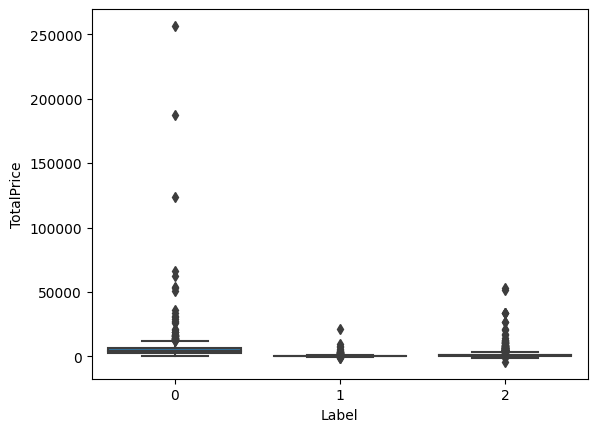

In [34]:
sns.boxplot(x="Label",y="TotalPrice",data=final_dataset)

<Axes: xlabel='Label', ylabel='InvoiceNo'>

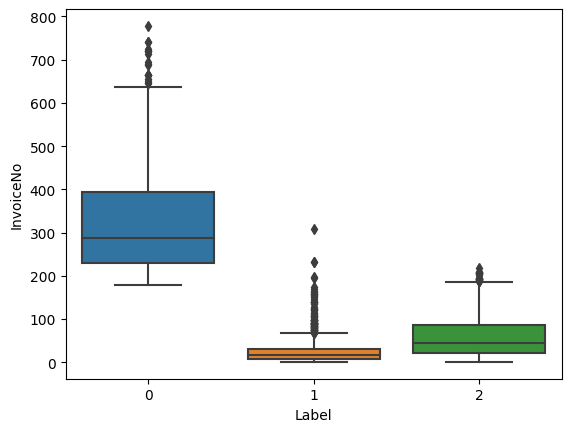

In [35]:
sns.boxplot(x="Label",y="InvoiceNo",data=final_dataset)

<Axes: xlabel='Label', ylabel='Duration'>

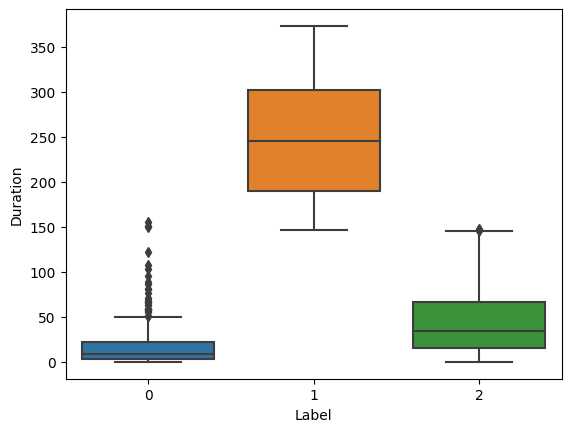

In [36]:
sns.boxplot(x="Label",y="Duration",data=final_dataset)

In [37]:
#function to calculate outliers
def outlier_treatment(col):
    sorted(col)
    Q1,Q3 = np.percentile(col , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [38]:
lower_range,upper_range = outlier_treatment(final_dataset['TotalPrice'])
print("Lower Range:",lower_range)
print("Upper Range:",upper_range)

Lower Range: -1617.38
Upper Range: 3469.9000000000005


In [39]:
#outliers of lower range
lower_final_dataset = final_dataset[final_dataset["TotalPrice"].values < lower_range]
lower_final_dataset

,CustomerID,Duration,InvoiceNo,TotalPrice,Label
3756,17448.0,144,1,-4287.63,2


In [40]:
#outliers of upper range
upper_final_dataset = final_dataset[final_dataset["TotalPrice"].values > upper_range]
upper_final_dataset

,CustomerID,Duration,InvoiceNo,TotalPrice,Label
1,12347.0,1,182,4310.00,0
10,12357.0,32,131,6207.67,2
12,12359.0,7,251,6182.98,0
15,12362.0,2,274,5154.58,0
20,12370.0,50,166,3541.94,2
...,...,...,...,...,...
4324,18223.0,1,299,6315.23,0
4326,18225.0,2,284,5356.86,0
4327,18226.0,38,245,5192.10,0
4330,18229.0,11,164,7276.90,2


In [41]:
#total outliers
lower_outliers = lower_final_dataset.value_counts().sum(axis=0)
upper_outliers = upper_final_dataset.value_counts().sum(axis=0)
total_outliers = lower_outliers + upper_outliers

print("Total Number of Outliers:",total_outliers)

Total Number of Outliers: 415


In [42]:
# index that contains outliers

lower_index = list(final_dataset[ final_dataset ['TotalPrice'] < lower_range ].index)

upper_index = list(final_dataset[ final_dataset['TotalPrice'] > upper_range ].index)

total_index = list(lower_index + upper_index)

print(total_index)


[3756, 1, 10, 12, 15, 20, 27, 50, 55, 56, 66, 67, 69, 70, 71, 73, 75, 79, 84, 86, 100, 101, 103, 105, 106, 110, 112, 115, 122, 124, 145, 154, 156, 157, 167, 169, 174, 178, 179, 191, 198, 204, 226, 231, 232, 238, 248, 256, 261, 262, 266, 273, 276, 277, 278, 282, 290, 295, 298, 300, 302, 308, 315, 318, 328, 329, 331, 333, 334, 338, 344, 350, 365, 385, 393, 395, 413, 436, 450, 458, 464, 472, 477, 479, 487, 491, 498, 507, 510, 516, 521, 525, 543, 556, 561, 565, 569, 572, 575, 576, 579, 587, 595, 605, 607, 638, 640, 652, 657, 669, 700, 701, 703, 737, 740, 745, 747, 752, 756, 786, 788, 803, 809, 815, 822, 836, 843, 859, 874, 888, 891, 899, 908, 909, 926, 942, 959, 988, 1005, 1016, 1054, 1062, 1067, 1078, 1082, 1095, 1123, 1136, 1144, 1188, 1196, 1206, 1219, 1221, 1229, 1233, 1241, 1251, 1259, 1266, 1268, 1274, 1276, 1277, 1293, 1295, 1298, 1304, 1311, 1327, 1329, 1363, 1367, 1368, 1370, 1420, 1432, 1434, 1437, 1442, 1443, 1466, 1494, 1495, 1510, 1516, 1528, 1534, 1537, 1597, 1614, 1621, 1633

In [43]:
print("Shape Before Dropping Outlier Rows:", final_dataset.shape)

final_dataset.drop(total_index, inplace = True)

print("Shape After Dropping Outlier Rows:", final_dataset.shape)

Shape Before Dropping Outlier Rows: (4343, 5)
Shape After Dropping Outlier Rows: (3928, 5)
